In [1]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../inkscape/cap6/"
PATH_EPS=BASE_PATH+"/../../../../eps/cap6/"
fname = "CentralDifferenceLocal_Crankshaft-73800Hexa"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = False
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

Number_Ranks  Number_Threads  Nodes_X_Threads        P1        P2        P4
0              1               1                1    1.0000    1.0000    1.0000
1              1               2                2    1.5667    1.8492    1.6255
2              1               4                4    2.9058    3.4985    3.1939
3              1               8                8    5.0137    6.6092    5.5845
4              1              16               16    6.8764   10.6653   11.0326
5              1              20               20    5.8428   12.4293   12.5102
6              1              40               40    8.4904   13.3687   14.2712
7              2               1                2    1.9094    1.9299    1.9620
8              2               2                4    2.8111    3.5078    3.1086
9              2               4                8    4.7360    6.5273    5.9889
10             2               8               16    7.1483   11.8762   12.4724
11             2              16               32    9.8465   17.1621   20.3534
12             2              20               40   10.4025   17.4030   24.8209
13             2              40               80   14.7503   21.1818   28.8811
14             4               1                4    4.2580    4.1234    4.1995
15             4               2                8    5.9780    7.3404    7.5499
16             4               4               16   10.8074   13.8262   13.1654
17             4               8               32   17.0077   24.7511   27.7849
18             4              16               64   20.0268   34.9694   43.1503
19             4              20               80   22.0550   36.0056   52.6851
20             4              40              160   30.8630   36.0943   55.7215
21             8               1                8    7.9336    7.8393    7.9119
22             8               2               16   11.1071   14.2103   15.2480
23             8               4               32   16.8862   25.2408   30.0348
24             8               8               64   26.5288   43.6200   52.6608
25             8              16              128   32.1960   67.6869   91.5302
26             8              20              160   37.4314   63.9023  100.3757
27             8              40              320   45.2638   68.6773  124.4349
28            16               1               16   15.9496   16.5719   15.9245
29            16               2               32   20.5797   30.6850   30.8398
30            16               4               64   35.9058   58.2371   61.0933
31            16               8              128   47.4119  102.9929  117.3295
32            16              16              256   57.2077  165.9562  197.1269
33            16              20              320   58.5912  142.1988  218.0242
34            16              40              640   73.8643  203.5312  243.0442
35            20               1               20   19.8261   20.7971   19.8921
36            20               2               40   26.4203   38.1313   39.0425
37            20               4               80   45.8854   74.7559   77.1291
38            20               8              160   56.7721  134.4267  129.9555
39            20              16              320   77.5900  201.2002  239.1681
40            20              20              400   76.6693  192.3265  293.2173
41            20              40              800   76.6693  265.8313  216.9604
42            25               1               25   25.0025   26.2640   24.9400
43            25               2               50   32.1000   47.6900   48.7417
44            25               4              100   52.5257   85.4695   95.6914
45            25               8              200   75.4163  152.3836  178.2519
46            25              16              400   78.1532  266.4072  260.2343
47            25              20              500  101.0531  226.6376  254.4634
48            25              40             1000   81.0284  300.3751  257.8724
49  

4x4 grid with   0% initially alive: average  0 generations
4x4 grid with  10% initially alive: average  1 generations
4x4 grid with  20% initially alive: average  2 generations
4x4 grid with  30% initially alive: average  3 generations
4x4 grid with  40% initially alive: average  3 generations
4x4 grid with  50% initially alive: average  3 generations
4x4 grid with  60% initially alive: average  2 generations
4x4 grid with  70% initially alive: average  1 generations
4x4 grid with  80% initially alive: average  1 generations
4x4 grid with  90% initially alive: average  1 generations
4x4 grid with 100% initially alive: average  1 generations
5x5 grid with   0% initially alive: average  0 generations
5x5 grid with  10% initially alive: average  2 generations
5x5 grid with  20% initially alive: average  6 generations
5x5 grid with  30% initially alive: average  9 generations
5x5 grid with  40% initially alive: average  9 generations
5x5 grid with  50% initially alive: average  8 generatio

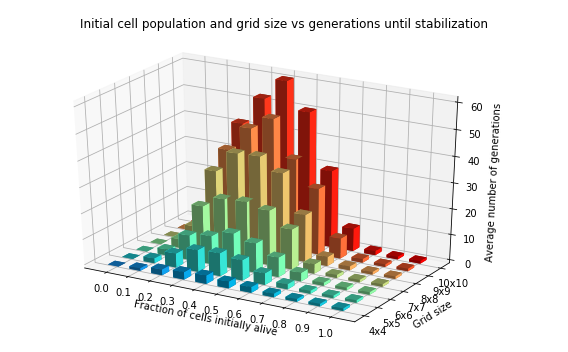

In [20]:
from __future__ import division
import time, random
import multiprocessing, functools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def make2DList(rows, columns, generator = lambda: False):
    return [[generator() for _ in range(rows)] for _ in range(columns)]

def iterate(today):
    tomorrow = make2DList(len(today), len(today[0]))
    for i, row in enumerate(tomorrow):
        for j, element in enumerate(row):
            neighbors = sum([ today[(i+x)%len(today)][(j+y)%len(row)] for x in [-1,0,1] for y in [-1,0,1] if (x,y) != (0,0) ])
            tomorrow[i][j] = (2 <= neighbors <= 3) if today[i][j] else (neighbors == 3)
            # The Rules
            # * For a space that is 'populated':
            #   - Each cell with one or no neighbors dies, as if by solitude.
            #   - Each cell with four or more neighbors dies, as if by overpopulation.
            #   - Each cell with two or three neighbors survives.
            # * For a space that is 'empty' or 'unpopulated'
            #   - Each cell with three neighbors becomes populated.
    return tomorrow

def simulate(size, startPercent, *args):
    history = [make2DList(size, size, lambda: random.random() < startPercent)]
    while history[-1] not in history[:-1]:
        history.append(iterate(history[-1]))
    iterationCount = len(history) - 1
    cycleLength = iterationCount - history[:-1].index(history[-1])
    return iterationCount - cycleLength

if __name__ == "__main__":
    startTime = time.time()
    POOL = multiprocessing.Pool()
    TRIALS = 100
    GRID_SIZES = range(4, 11)
    POPULATION_PERCENTAGES = [n/10 for n in range(0,11)]
    data = []
    for SIZE in GRID_SIZES:
        data.append([])
        for START_PERCENT in POPULATION_PERCENTAGES:
            results = POOL.map(functools.partial(simulate, SIZE, START_PERCENT), range(TRIALS))
            data[-1].append(sum(results)/TRIALS)
            print("{0}x{0} grid with {1:3.0f}% initially alive: average {2:2.0f} generations".format(SIZE, START_PERCENT*100, round(data[-1][-1])))

    print("Took {:.2f} seconds.".format(time.time() - startTime))

    fig = plt.figure(figsize=(8,5))
    ax = fig.gca(projection='3d')

    x = list(range(len(data[0]))) * len(data)
    y = sum([[i]*len(data[0]) for i in range(len(data))], [])
    z = [0] * len(data[0]) * len(data)
    
#     print(data)
    
#     print("---------------------------")
    
#     print(x)
#     print(y)
#     print(z)

    dx = 0.5
    dy = 0.5
    dz = sum(data, [])
    
#     print("====================")
#     print(dx)
#     print(dy)
#     print(dz)

    ax.w_xaxis.set_ticks([i+dx/2 for i in range(len(data[0]))])
    ax.w_xaxis.set_ticklabels(POPULATION_PERCENTAGES)
    print([i+dx/2 for i in range(len(data[0]))])
    print(POPULATION_PERCENTAGES)

    ax.w_yaxis.set_ticks([i+dy/2 for i in range(len(data))])
    ax.w_yaxis.set_ticklabels(['{0}x{0}'.format(i) for i in GRID_SIZES])

    ax.set_title('Initial cell population and grid size vs generations until stabilization')
    ax.set_xlabel('Fraction of cells initially alive')
    ax.set_ylabel('Grid size')
    ax.set_zlabel('Average number of generations')

    # stretch axis, thanks to stackoverflow.com/q/30223161
    ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, len(data)/len(data[0]), 1, 1]))

    colors = cm.rainbow( [0.2 + (1-0.2)/(len(x)-1)*i for i in range(len(x))] )
    ax.bar3d(x, y, z, dx, dy, dz, colors)
    plt.tight_layout()
    plt.show()